In [1]:
import time
import datetime
import pickle

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) 
sys.path.insert(0, module_path)

In [3]:
from hex_plot import plot_problem
from hex_star import PathfindingProblem, inf_bidirectional_search, f, f2, time_to_goal, time_to_start

In [4]:
maps_dir = "maps"

In [5]:
def save_layout(layout, filename):
    with open(filename, 'wb') as file:
        pickle.dump(layout, file)

def load_layout(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [6]:
def solve(filename):
    hex_layout = load_layout(filename)
    state_tuple = (
        hex_layout['agent'],
        hex_layout['velocity']
    )
    params_f = {
        'hex_map': hex_layout['hex_map'],
        'obstacle_map': hex_layout['obstacle_map'],
        'goal_loc': hex_layout['goal'],
        'hex_radius': hex_layout['hex_radius'],
        'hex_size': hex_layout['hex_size'],
        'acceleration_max': 5,
        'deceleration_max': 5,
        'lat_acceleration_max': 2
    }
    #Look into the probelm with finding the initial state node object for the secondary problem, 

    h = time_to_goal
    h2 = time_to_start
    problem_f = PathfindingProblem(state_tuple, **params_f)
    solution = inf_bidirectional_search(problem_f, f, f2, h, h2)
    return problem_f, solution
    

Processing map file: r3h0.33.pkl

meeting point:  (-2, 3)
Solution depth 11 found in 0.0035445690155029297 seconds
Explored 218 states.
Processing map file: r15h1.00.pkl

meeting point:  (0, 0)
Solution depth 45 found in 1.0223464965820312 seconds
Explored 65309 states.
Processing map file: r20h1.00.pkl

meeting point:  (1, -3)
Solution depth 100 found in 49.86202573776245 seconds
Explored 1999991 states.
Processing map file: r30h5.00.pkl

meeting point:  (8, -5)
Solution depth 72 found in 49.83427429199219 seconds
Explored 1884110 states.
Processing map file: r40h5.00.pkl

meeting point:  (-12, 14)
Solution depth 97 found in 37.041624546051025 seconds
Explored 1266996 states.


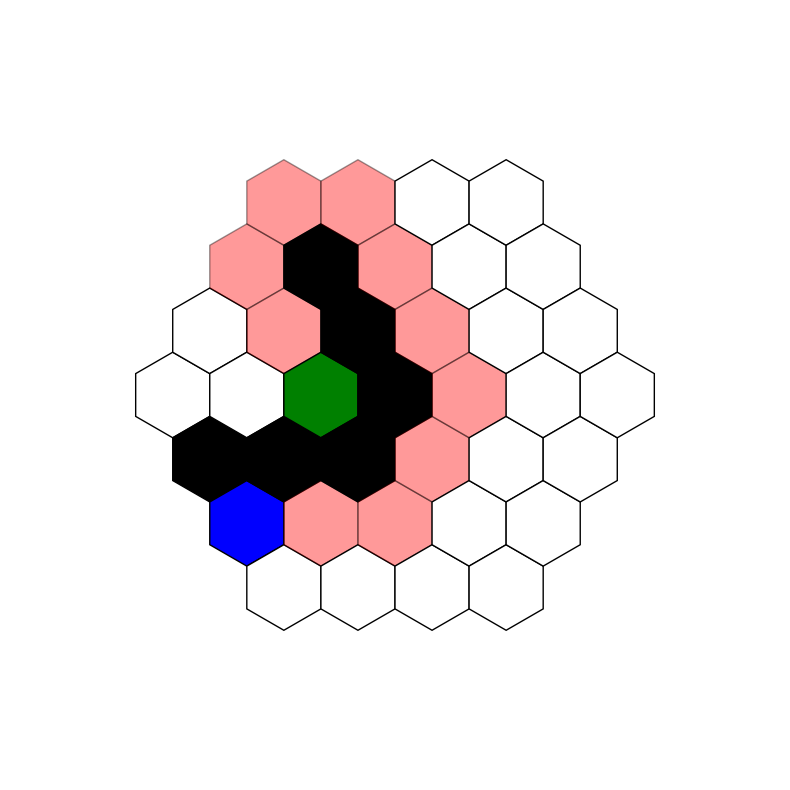

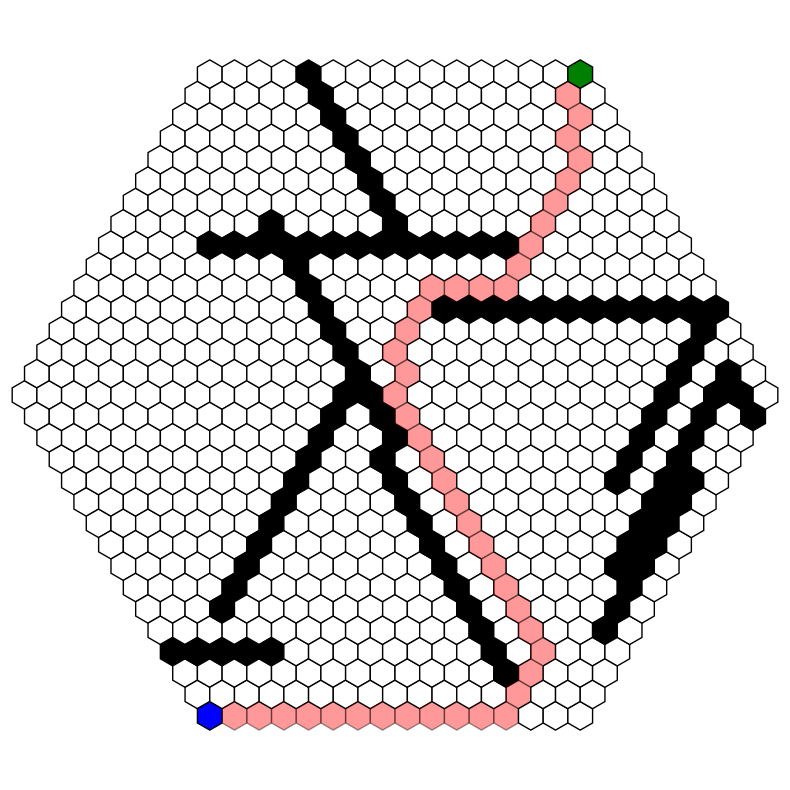

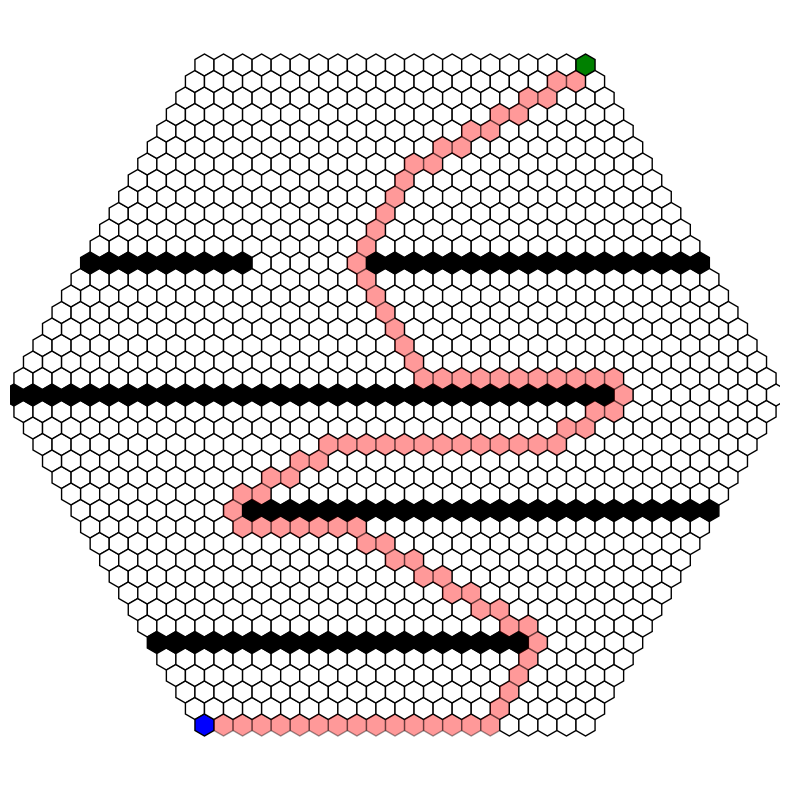

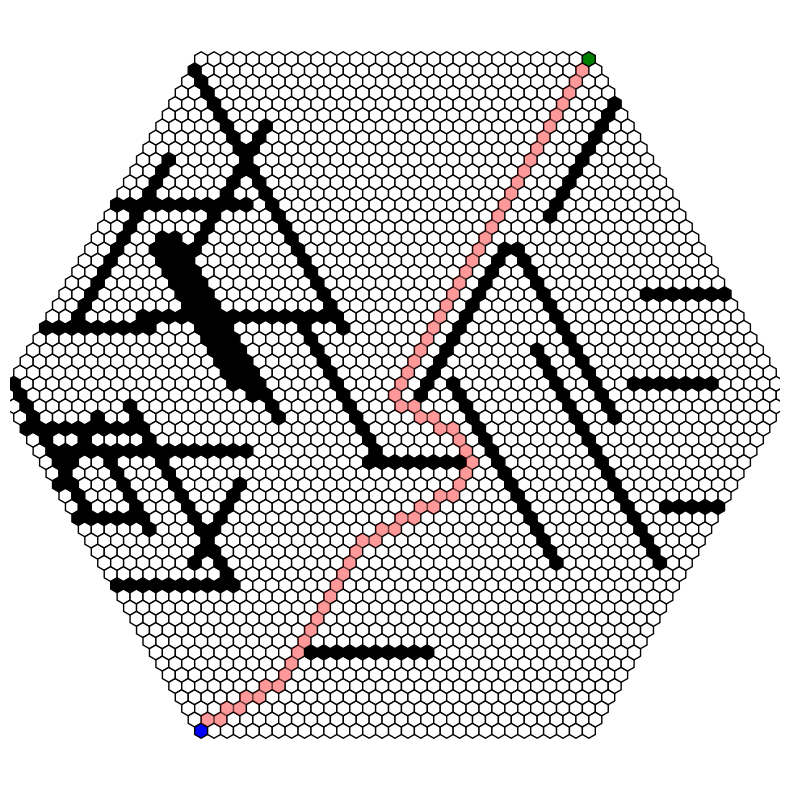

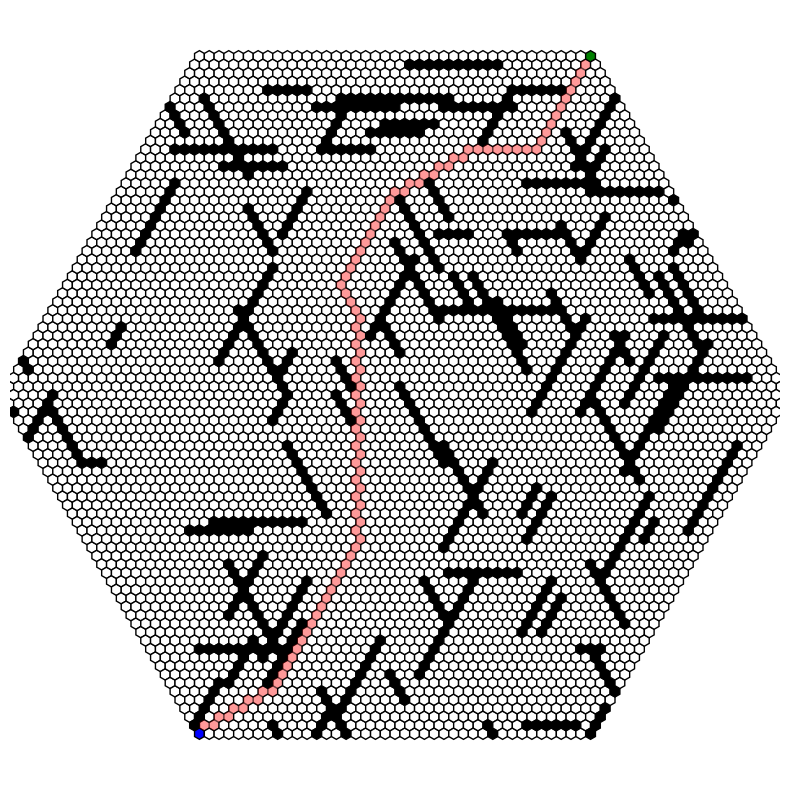

In [7]:
# Dictionaries to store the data
states_data = {}
nodes_data = {}
branching_data = {}
depths_data = {}
problems = {}
solutions = {}

# Heuristic functions to use
#heuristics = [zero_heuristic, box_goal_euclidian_distance, box_goal_manhattan_distance]

maps = [
    'r3h0.33.pkl',
    'r15h1.00.pkl',
    'r20h1.00.pkl',
    'r30h5.00.pkl',
    'r40h5.00.pkl'
]
for m in maps:
    print(f"Processing map file: {m}\n")
    states_expanded = []
    nodes_generated = []
    eff_branching_factors = []
    depths = []
    
    # Start the timer
    start = time.time()

    # Execute the search
    problem, solution = solve(maps_dir +"/"+ m)
    end = time.time()
    if solution is not None:
        consistent, states, nodes = problem.get_benchmarks()
        solution_cost = solution.path_cost
        states_expanded.append(states)
        nodes_generated.append(nodes)
        depths.append(solution_cost)

        current_node = solution
        solution_path = []
        while current_node.parent is not None:
            #print(current_node.state)
            #sprint(current_node.path_cost)
            loc, v = current_node.state
            cost = current_node.path_cost
            solution_path.append(loc)
            #velocities.append(v)
            #path_costs.append(cost)
            current_node = current_node.parent
        
        solution_path = list(reversed(solution_path))
        #print(*solution_path, sep='\n')
        #velocities = list(reversed(velocities))
        #path_costs = list(reversed(path_costs))
        eff_branch_factor = pow(nodes, 1/len(solution_path))
        eff_branching_factors.append(eff_branch_factor)
        plot_problem(problem, solution_path)
    else:
        solution_cost = None
        eff_branch_factor = None
    print(f"Solution depth {len(solution_path)} found in {end-start} seconds\nExplored {nodes} states.")
    if not consistent:
        print(f"Test case {m} has shown the heuristic is not consistent")
    states_data[m] = states_expanded
    nodes_data[m] = nodes_generated
    branching_data[m] = eff_branching_factors
    depths_data[m] = depths
    problems[m] = problem
    solutions[m] = solution

In [8]:
states_data

{'r3h0.33.pkl': [130],
 'r15h1.00.pkl': [35832],
 'r20h1.00.pkl': [1051215],
 'r30h5.00.pkl': [969491],
 'r40h5.00.pkl': [660840]}

In [9]:
nodes_data

{'r3h0.33.pkl': [218],
 'r15h1.00.pkl': [65309],
 'r20h1.00.pkl': [1999991],
 'r30h5.00.pkl': [1884110],
 'r40h5.00.pkl': [1266996]}

In [10]:
branching_data

{'r3h0.33.pkl': [1.631499533572826],
 'r15h1.00.pkl': [1.279379538851994],
 'r20h1.00.pkl': [1.1561396094576066],
 'r30h5.00.pkl': [1.2222336983579847],
 'r40h5.00.pkl': [1.1558865458119922]}

In [11]:
depths_data

{'r3h0.33.pkl': [0],
 'r15h1.00.pkl': [0],
 'r20h1.00.pkl': [0],
 'r30h5.00.pkl': [0],
 'r40h5.00.pkl': [0]}